In [39]:
from __future__ import division
import numpy as np
import scipy as sp
import math
import pandas as pd
import ipympl
import matplotlib.pyplot as plt
from clustering import cluster_lab
from generate_data import gen_data
from pred_analysis import *
import init_dict
import scipy.stats as st
from cycler import cycler

In [158]:
df1 = pd.read_csv('dl_1.0.csv')
df2 = pd.read_csv('dl_0.5.csv')
df3 = pd.read_csv('dl_0.2_0.csv')
df = pd.concat([df1,df2,df3], ignore_index=True)
print len(df)
df.head()

798


,m,n,k,p,L,G,r,lda,u,init_fit,bcs_fit,cs_fit,minc,maxc,mink0,maxk0,avgk_0,mink1,maxk1,avgk_1
0,50,200,1,10,100,1000,0.2,5,1.0,0.502596,0.494245,1.0,0.000028,0.356919,0.385,0.826,0.613692,0.402,0.844,0.580308
1,50,200,1,10,100,1000,0.2,25,1.0,-0.019444,-0.042630,1.0,0.000008,0.130334,0.030,0.504,0.169654,0.062,0.656,0.223269
2,50,200,1,10,100,1000,0.2,45,1.0,0.211343,0.112087,1.0,0.000031,0.155110,0.009,1.000,0.609115,0.020,0.664,0.368462
3,50,200,1,10,100,1000,0.2,65,1.0,0.665538,0.159284,1.0,0.000026,0.162638,1.000,1.000,1.000000,0.148,0.587,0.231462
4,50,200,1,10,100,1000,0.2,85,1.0,0.464861,0.048999,1.0,0.000003,0.257763,0.001,1.000,0.811923,0.001,0.600,0.172038


In [162]:
df.to_csv('dl_density.csv',index_label=False )

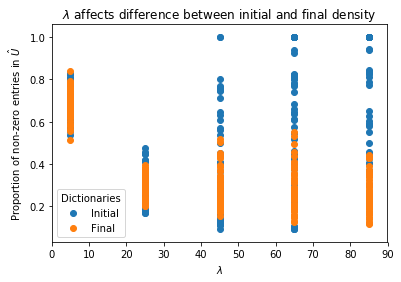

In [94]:
%matplotlib inline
plt.figure()
plt.scatter(df.lda, df.avgk_0, label='Initial')
plt.scatter(df.lda, df.avgk_1, label = 'Final')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Proportion of non-zero entries in $\hat{U}$')
plt.legend(title='Dictionaries')
plt.title('$\lambda$ affects difference between initial and final density')

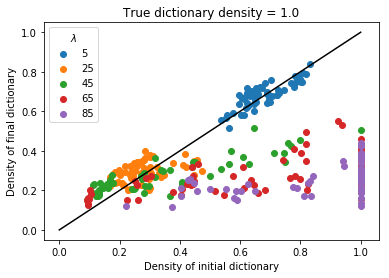

In [130]:
plt.figure()
groups = df.groupby('lda')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Density of initial dictionary')
plt.ylabel('Density of final dictionary')
plt.legend(title=r'$\lambda$')
plt.title('True dictionary density = 1.0')

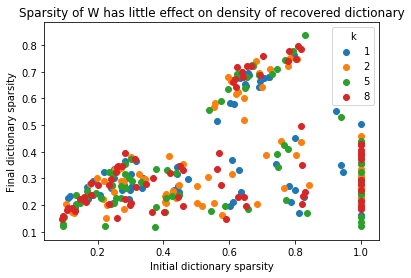

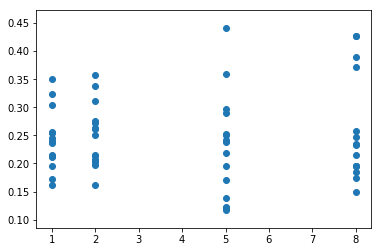

In [121]:
plt.figure()
groups = df.groupby('k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Initial dictionary sparsity')
plt.ylabel('Final dictionary sparsity')
plt.legend(title=r'k')
plt.title('Sparsity of W has little effect on density of recovered dictionary')

plt.figure()
plt.scatter(df[df.lda==85].k, df[df.lda==85].avgk_1)

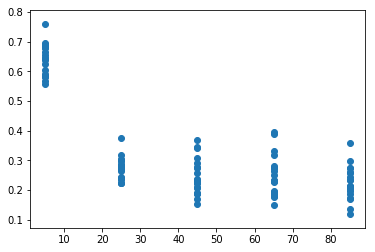

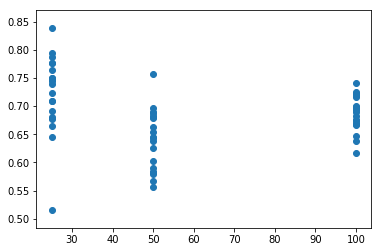

In [99]:


s = df[df.m==50]
plt.scatter(s.lda, s.avgk_1)

plt.figure()
s = df[df.lda==5]
plt.scatter(s.m, s.avgk_1)

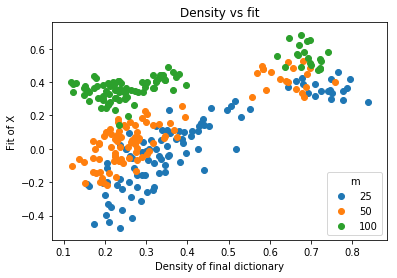

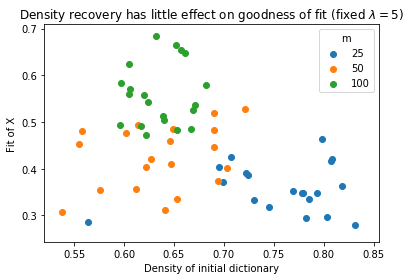

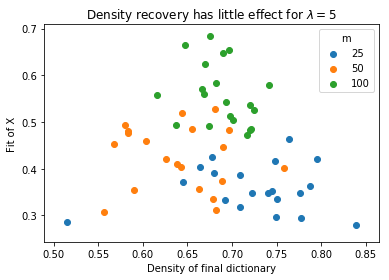

In [102]:
plt.figure()
s = df
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit')

plt.figure()
s = df[(df.lda==5)]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_0, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of initial dictionary')
plt.ylabel('Fit of X')
plt.title('Density recovery has little effect on goodness of fit (fixed $\lambda=5$)')

plt.figure()
s = df[df.lda==5]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density recovery has little effect for $\lambda=5$')

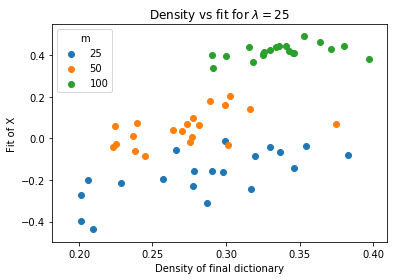

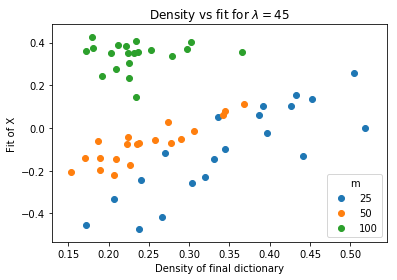

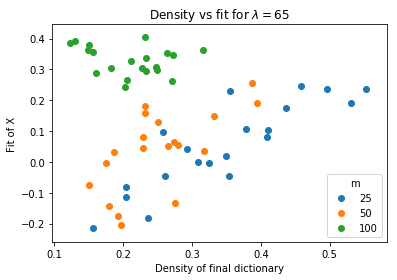

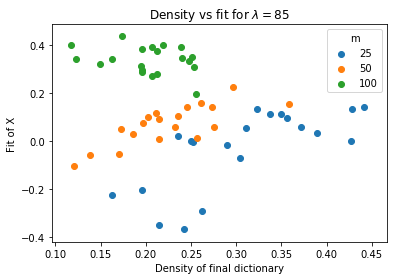

In [108]:
plt.figure()
s = df[df.lda==25]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit for $\lambda = 25$')

plt.figure()
s = df[df.lda==45]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit for $\lambda = 45$')

plt.figure()
s = df[(df.lda==65)]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit for $\lambda = 65$')
plt.figure()
s = df[df.lda==85]
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit for $\lambda = 85$')

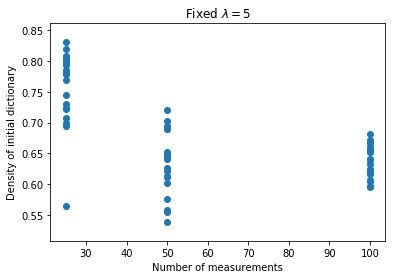

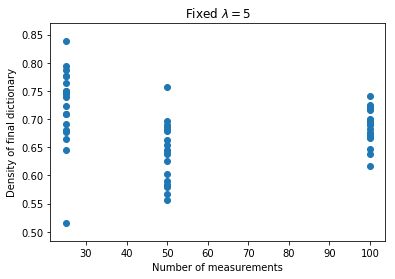

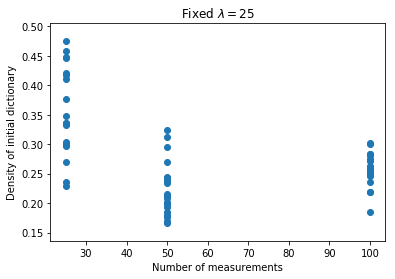

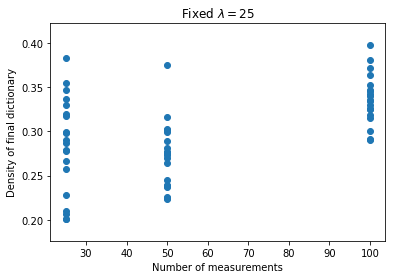

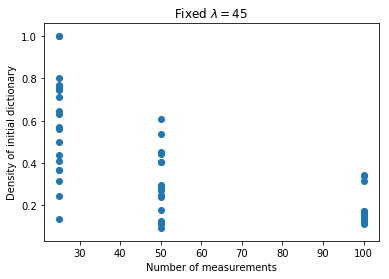

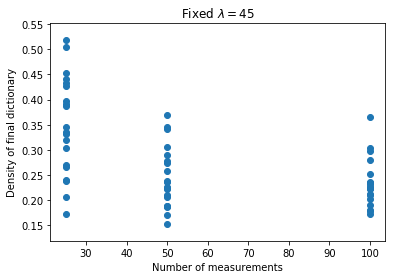

In [122]:
plt.figure()
s=df[df.lda==5]
plt.scatter(s.m, s.avgk_0)
plt.ylabel('Density of initial dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 5$')

plt.figure()
s=df[df.lda==5]
plt.scatter(s.m, s.avgk_1)
plt.ylabel('Density of final dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 5$')

plt.figure()
s=df[df.lda==25]
plt.scatter(s.m, s.avgk_0)
plt.ylabel('Density of initial dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 25$')

plt.figure()
s=df[df.lda==25]
plt.scatter(s.m, s.avgk_1)
plt.ylabel('Density of final dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 25$')
plt.figure()
s=df[df.lda==45]
plt.scatter(s.m, s.avgk_0)
plt.ylabel('Density of initial dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 45$')

plt.figure()
s=df[df.lda==45]
plt.scatter(s.m, s.avgk_1)
plt.ylabel('Density of final dictionary')
plt.xlabel('Number of measurements')
plt.title('Fixed $\lambda = 45$')

300

In [156]:
df2.head()

,m,n,k,p,L,G,r,lda,u,init_fit,bcs_fit,cs_fit,minc,maxc,mink0,maxk0,avgk_0,mink1,maxk1,avgk_1
0,200,200,1,10,100,1000,0.2,5,0.5,0.559020,0.772423,1.0,0.000018,0.901209,0.433,0.768,0.62516,0.627,0.834,0.74924
1,200,200,1,10,100,1000,0.2,25,0.5,0.411558,0.651246,1.0,0.000002,0.785429,0.091,0.539,0.36144,0.294,0.734,0.53764
2,200,200,1,10,100,1000,0.2,45,0.5,0.269844,0.518663,1.0,0.000054,0.765232,0.009,0.427,0.22840,0.181,0.673,0.41112
3,200,200,1,10,100,1000,0.2,65,0.5,0.152388,0.398718,1.0,0.000060,0.626001,0.054,0.330,0.15776,0.085,0.573,0.33656
4,200,200,1,10,100,1000,0.2,85,0.5,0.084234,0.393638,1.0,0.000009,0.577716,0.001,0.252,0.11184,0.003,0.510,0.27524


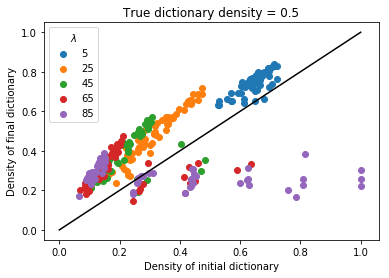

In [143]:
plt.figure()
groups = df2.groupby('lda')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='k')
for name, group in groups:
    plt.scatter(group.avgk_0, group.avgk_1, label = name)
plt.xlabel('Density of initial dictionary')
plt.ylabel('Density of final dictionary')
plt.legend(title=r'$\lambda$')
plt.title('True dictionary density = 0.5')

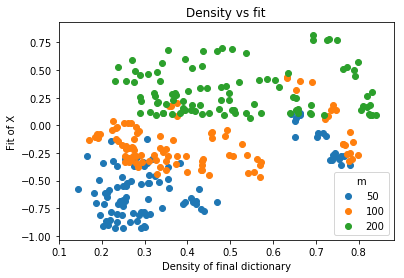

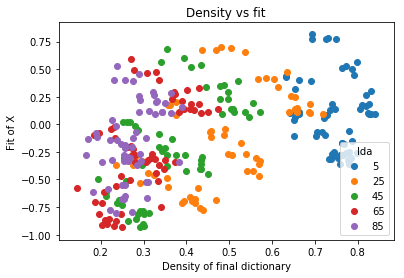

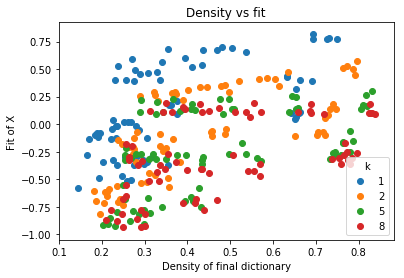

In [145]:
plt.figure()
s = df2
groups = s.groupby('m')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='m')
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit')

plt.figure()
s = df2
groups = s.groupby('lda')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='lda', loc=4)
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit')

plt.figure()
s = df2
groups = s.groupby('k')
for name, group in groups:
    plt.scatter(group.avgk_1, group.bcs_fit, label = name)
plt.legend(title='k', loc=4)
plt.xlabel('Density of final dictionary')
plt.ylabel('Fit of X')
plt.title('Density vs fit')
